<a href="https://colab.research.google.com/github/nandansuresh97/practise-/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/titanic_dataset.csv', index_col ='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data1 = data.copy()
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data1.shape

(891, 11)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:

data1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data1.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
data1['Age'].median()

28.0

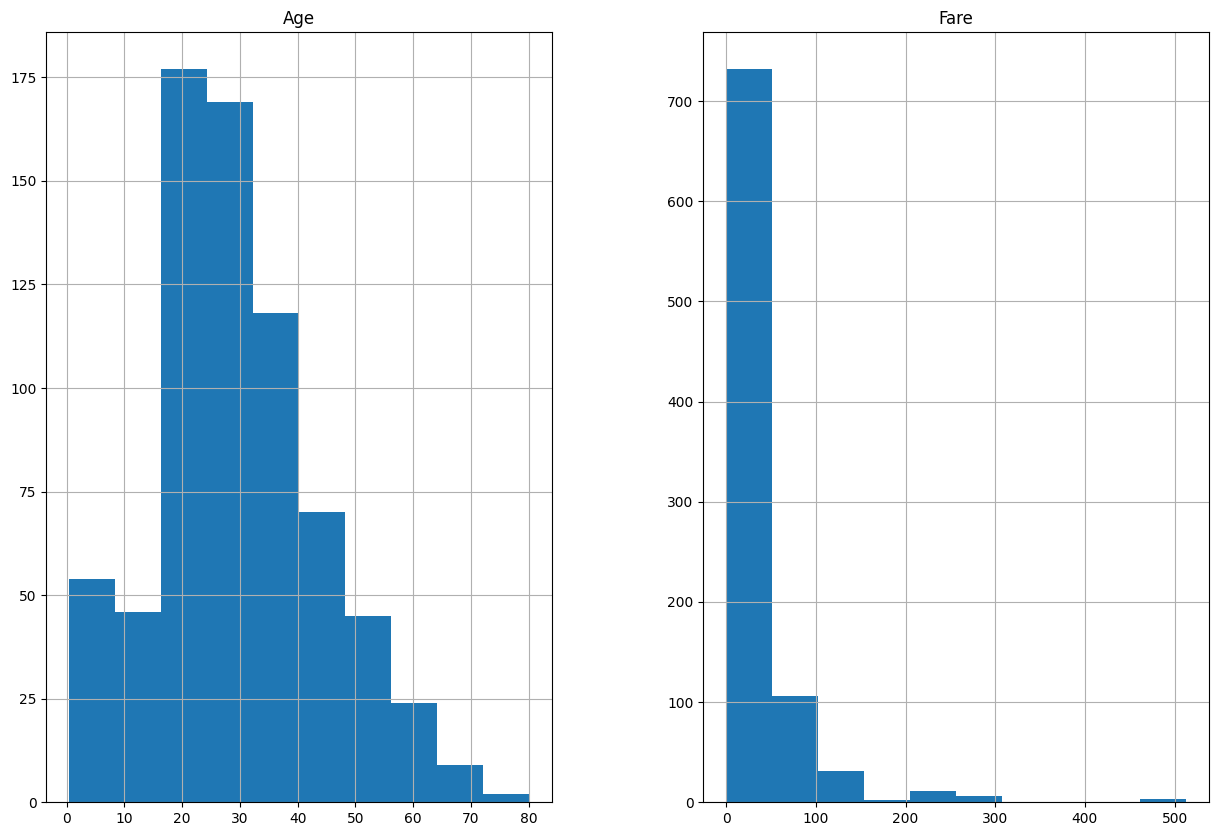

In [9]:
freqgraph = data1.select_dtypes(include='float64')
freqgraph.hist(figsize=(15,10));


In [10]:
num_col = ['Age']

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy='median')
data1[num_col]=imputer.fit_transform(data1[num_col])

In [13]:
data1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
drop_col=['Name','Ticket','Cabin']
data1= data1.drop(drop_col,axis=1)
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [15]:
data1['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [16]:
data1['Embarked'].fillna(data1['Embarked'].mode()[0], inplace=True)

In [17]:
data1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: xlabel='Age'>

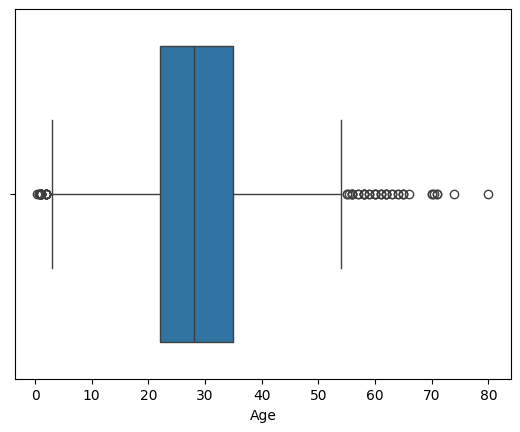

In [19]:
sns.boxplot(x=data1['Age'])

In [21]:
Q1 = data1['Age'].quantile(0.25)
Q3 = data1['Age'].quantile(0.75)

IQR = Q3-Q1
print(IQR)

13.0


In [22]:
up = Q3 + 1.5 * IQR
low = Q1 - 1.5 * IQR

print("Upper limit is ",up)
print("Lower limit is ",low)


Upper limit is  54.5
Lower limit is  2.5


In [23]:
def lim_imputer(value):
  if value>up:
    return up
  if value<low:
    return low
  else:
    return value

In [25]:
data1['Age'] = data1['Age'].apply(lim_imputer)

<Axes: xlabel='Age'>

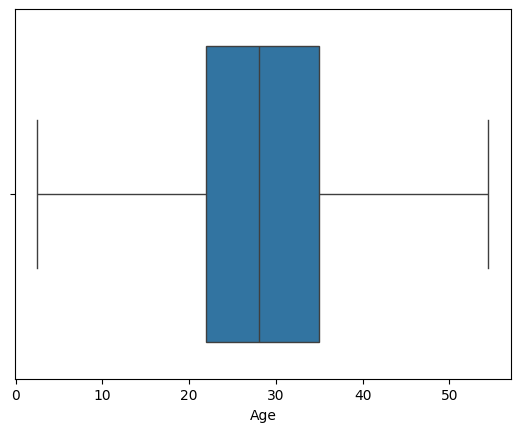

In [26]:
sns.boxplot(x=data1['Age'])

<Axes: xlabel='SibSp'>

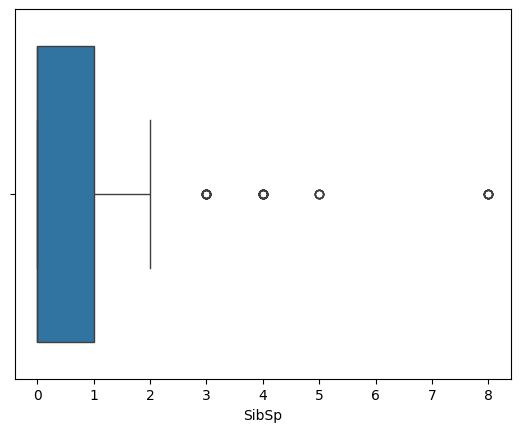

In [28]:
sns.boxplot(x=data1['SibSp'])

In [29]:
Q1 = data1['SibSp'].quantile(0.25)
Q3 = data1['SibSp'].quantile(0.75)

IQR = Q3-Q1
print(IQR)

1.0


In [31]:
up = Q3 + 1.5 * IQR
low = Q1 - 1.5 * IQR
print("Upper limit is ",up)
print("Lower limit is ",low)


Upper limit is  2.5
Lower limit is  -1.5


In [32]:
def lim_imputer(value):
  if value>up:
    return up
  if value<low:
    return low
  else:
    return value

In [33]:
data1['SibSp'] = data1['SibSp'].apply(lim_imputer)

<Axes: xlabel='SibSp'>

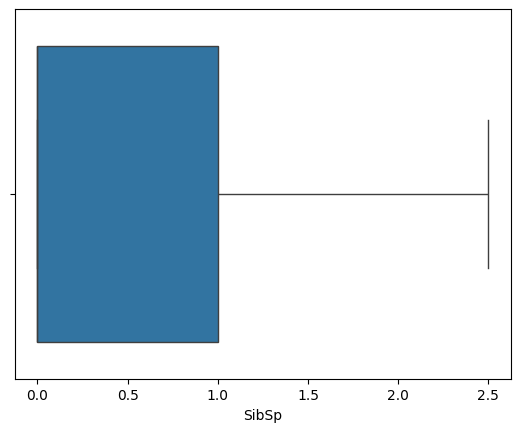

In [35]:
sns.boxplot(x=data1['SibSp'])

<Axes: xlabel='Fare'>

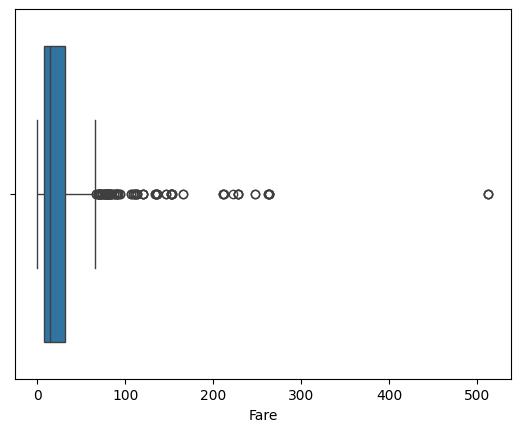

In [36]:
sns.boxplot(x=data1['Fare'])

In [38]:
Q1 = data1['Fare'].quantile(0.25)
Q3 = data1['Fare'].quantile(0.75)

IQR = Q3-Q1
print(IQR)

23.0896


In [39]:
up = Q3 + 1.5 * IQR
low = Q1 - 1.5 * IQR

print("Upper limit is ",up)
print("Lower limit is ",low)

Upper limit is  65.6344
Lower limit is  -26.724


In [40]:
def lim_imputer(value):
  if value>up:
    return up
  if value<low:
    return low
  else:
    return value

In [41]:
data1['Fare'] = data1['Fare'].apply(lim_imputer)

<Axes: xlabel='Fare'>

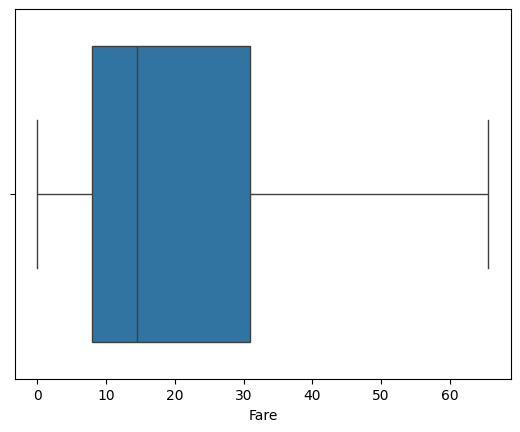

In [43]:

sns.boxplot(x=data1['Fare'])

In [44]:
#Encoding Categorical Variables
data1.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp       float64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [46]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
data1['Sex'] = label_encoder.fit_transform(data1['Sex'])
data1['Embarked'] = label_encoder.fit_transform(data1['Embarked'])

print("Dataset after encoding categorical variables:\n", data1.head())


Dataset after encoding categorical variables:
              Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                              
1                   0       3    1  22.0    1.0      0   7.2500         2
2                   1       1    0  38.0    1.0      0  65.6344         0
3                   1       3    0  26.0    0.0      0   7.9250         2
4                   1       1    0  35.0    1.0      0  53.1000         2
5                   0       3    1  35.0    0.0      0   8.0500         2


In [48]:
#feature Scaling
from sklearn.preprocessing import StandardScaler


X = data1.drop(columns=['Survived'])
y = data1['Survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


print("Features after scaling:\n", X_scaled[:5])




Features after scaling:
 [[ 0.82737724  0.73769513 -0.58343208  0.81022003 -0.47367361 -0.82055245
   0.58595414]
 [-1.56610693 -1.35557354  0.74268522  0.81022003 -0.47367361  2.03162322
  -1.9423032 ]
 [ 0.82737724 -1.35557354 -0.25190275 -0.60251196 -0.47367361 -0.78757757
   0.58595414]
 [-1.56610693 -1.35557354  0.49403823  0.81022003 -0.47367361  1.4192968
   0.58595414]
 [ 0.82737724  0.73769513  0.49403823 -0.60251196 -0.47367361 -0.78147111
   0.58595414]]


In [49]:
#Creating kNN and SVM Models


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear')


print("kNN and SVM models created.")



kNN and SVM models created.


In [50]:
#k-Fold Cross-Validation

from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)



In [51]:
#Evaluate kNN model using k-fold cross-validation

knn_scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='accuracy')


print("kNN average accuracy with k-fold cross-validation: ", np.mean(knn_scores))



kNN average accuracy with k-fold cross-validation:  0.8002008662356414


In [52]:
#Evaluate SVM model using k-fold cross-validation

svm_scores = cross_val_score(svm, X_scaled, y, cv=kf, scoring='accuracy')
print("SVM average accuracy with k-fold cross-validation: ", np.mean(svm_scores))



SVM average accuracy with k-fold cross-validation:  0.786761659657272


In [54]:
#Stratified k-Fold Cross-Validation

from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



In [55]:
#Evaluate kNN model using stratified k-fold cross-validation

knn_stratified_scores = cross_val_score(knn, X_scaled, y, cv=skf, scoring='accuracy')
print("kNN average accuracy with stratified k-fold cross-validation: ", np.mean(knn_stratified_scores))

kNN average accuracy with stratified k-fold cross-validation:  0.817048521750047


In [56]:
#Evaluate SVM model using stratified k-fold cross-validation

svm_stratified_scores = cross_val_score(svm, X_scaled, y, cv=skf, scoring='accuracy')
print("SVM average accuracy with stratified k-fold cross-validation: ", np.mean(svm_stratified_scores))

SVM average accuracy with stratified k-fold cross-validation:  0.7867553825874082
